# [문제 1] [사용자 행동 인식 데이터]에서 학습 데이터, 테스트 데이터, 학습 레이블, 테스트 레이블을 읽어오시오.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
feature = pd.read_csv('uci_human_activity/features.txt', sep=' ', index_col=0, names=['feature'])
feature

,feature
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y
...,...
557,"angle(tBodyGyroMean,gravityMean)"
558,"angle(tBodyGyroJerkMean,gravityMean)"
559,"angle(X,gravityMean)"
560,"angle(Y,gravityMean)"


In [5]:
x_train = pd.read_csv('uci_human_activity/train/X_train.txt', sep='\s+', header=None)
x_train.columns = feature['feature'].values
x_train[:2]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [6]:
x_test = pd.read_csv('uci_human_activity/test/X_test.txt', sep='\s+', header=None)
x_test.columns = feature['feature'].values
x_test[:2]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898


In [7]:
y_train = pd.read_csv('uci_human_activity/train/y_train.txt', names=['value'])
y_train

,value
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [8]:
y_test = pd.read_csv('uci_human_activity/test/y_test.txt', names=['value'])
y_test

,value
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


# [문제 2] feature.txt 파일에서 중복된 피처명을 수정하시오. 

In [9]:
def duplicate(fun):
    duplicates = fun.columns.duplicated(keep=False)
    count_dict = {}
    for i, col in enumerate(fun.columns):
        if duplicates[i]:
            if col in count_dict:
                count_dict[col] += 1
            else:
                count_dict[col] = 0
            fun.columns.values[i] = f'{col}_{count_dict[col]}'

In [10]:
duplicate(x_train)
duplicate(x_test)

# [문제 3] 결정트리로 학습/예측/평가하시오. 

In [11]:
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습
dt_clf.fit(x_train, y_train)

# 예측
pred = dt_clf.predict(x_test)

# 평가
accuracy = accuracy_score(y_test, pred)
accuracy

0.8612147947064812

# [문제 4] 결정트리의 하이퍼파라미터를 조정하며, 학습/예측/평가하시오.

In [12]:
dt_clf = DecisionTreeClassifier(random_state=11)

parameter = {'max_depth' : [ 5, 6, 7, 8, 9 , 10, 11, 12, 14, 16, 18, 20], 'min_samples_split': [12, 14, 16, 18]}

grid_search = GridSearchCV(dt_clf, param_grid=parameter, cv=5, return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18,
                                       20],
                         'min_samples_split': [12, 14, 16, 18]},
             return_train_score=True)

In [13]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 12}

In [14]:
grid_search.best_score_

0.8528389683541671

In [15]:
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeClassifier(max_depth=10, min_samples_split=12, random_state=11)

# [문제 5] 문제4에서 학습된 모델의 주요 피처 상위 20개를 막대 그래프로 시각화하시오.

In [16]:
feature_importance = pd.Series(best_estimator.feature_importances_, index=x_train.columns)

feature_importance_20 = feature_importance.sort_values(ascending=False)[:20]
feature_importance_20

tGravityAcc-min()-X               0.245833
fBodyAcc-mad()-X                  0.206272
angle(Y,gravityMean)              0.138791
fBodyAccMag-energy()              0.112050
tGravityAcc-arCoeff()-Z,2         0.098533
fBodyGyro-maxInds-X               0.023259
tBodyGyro-correlation()-Y,Z       0.016023
tGravityAcc-energy()-Y            0.015946
tGravityAccMag-arCoeff()1         0.015274
tBodyGyro-max()-X                 0.008877
fBodyAcc-max()-Y                  0.008563
tGravityAcc-max()-Y               0.008005
tBodyAcc-correlation()-X,Y        0.006841
tBodyGyro-min()-X                 0.005311
fBodyGyro-max()-X                 0.005091
tGravityAcc-min()-Y               0.003873
tBodyAccJerk-correlation()-X,Y    0.003849
tBodyGyroJerk-max()-X             0.003368
tGravityAcc-arCoeff()-Y,3         0.002935
angle(Z,gravityMean)              0.002898
dtype: float64

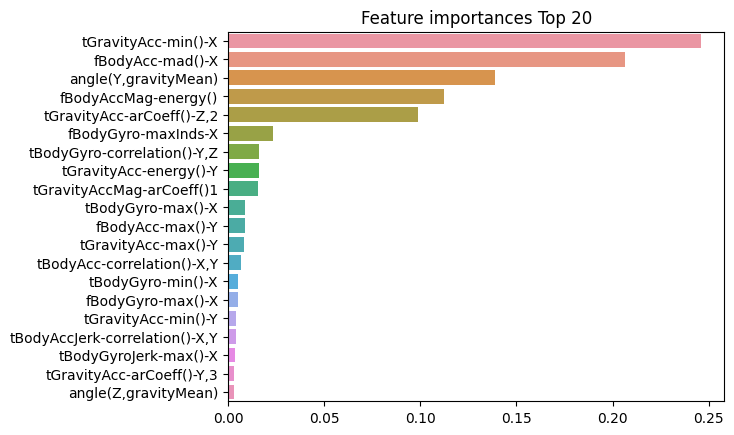

In [45]:
plt.title('Feature importances Top 20')
sns.barplot(x=feature_importance_20, y=feature_importance_20.index, width=0.8)
plt.savefig('barplot.png', bbox_inches='tight')